Name : Hidayah Husnul Khotimah | Username : hidayahhk | Email : hidayahhk@gmail.com

In [1]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-13 21:19:18--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.56MB/s    in 73s     

2021-07-13 21:20:32 (4.21 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [2]:
import zipfile,os

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
! pip install split-folders

In [4]:
import splitfolders 

splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', output="/tmp/rockpaperscissors/rps-cv-images/dataset-output", seed=42, ratio=(0.8,0.2), group_prefix=None)

Copying files: 2188 files [00:00, 3529.94 files/s]


In [5]:
base_dir_new = '/tmp/rockpaperscissors/rps-cv-images/dataset-output'
train_dir_new = os.path.join(base_dir_new,'train')
validation_dir_new = os.path.join(base_dir_new, 'val')

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [7]:
train_generator = train_datagen.flow_from_directory(
        train_dir_new,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir_new,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [8]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

In [9]:
initial_learning_rate = 0.01
epochs = 50
decay = initial_learning_rate / epochs

def lr_time_based_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [11]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=5,
      callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_time_based_decay, verbose=2)])

Epoch 1/50

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
25/25 [==============================] - 41s 2s/step - loss: 1.3900 - accuracy: 0.3663 - val_loss: 1.0889 - val_accuracy: 0.3750
Epoch 2/50

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0009998000874799553.
25/25 [==============================] - 40s 2s/step - loss: 1.0583 - accuracy: 0.4737 - val_loss: 1.3712 - val_accuracy: 0.3625
Epoch 3/50

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0009994002858602087.
25/25 [==============================] - 39s 2s/step - loss: 0.7106 - accuracy: 0.7085 - val_loss: 0.5082 - val_accuracy: 0.8188
Epoch 4/50

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0009988009951623015.
25/25 [==============================] - 39s 2s/step - loss: 0.4058 - accuracy: 0.8504 - val_loss: 0.2943 - val_accuracy: 0.9000
Epoch 5/50

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0009980025676285312.
25/2

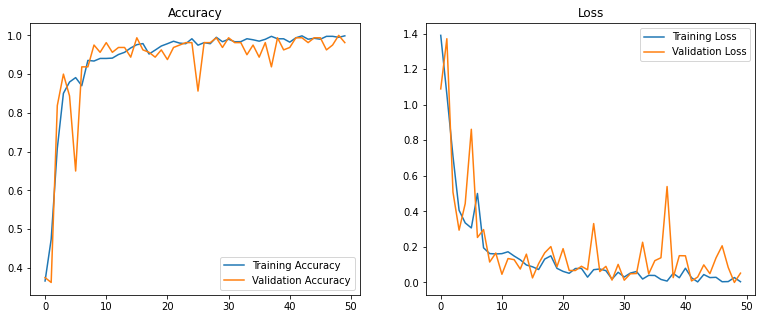

In [12]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [13]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpnyn40c4i/assets


In [16]:
with tf.io.gfile.GFile('image-model.tflite', 'wb') as f:
  f.write(tflite_model)